<a href="https://colab.research.google.com/github/Abhimanyukb/machine-learning-projects/blob/main/thyroid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [33]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [34]:
df.rename(columns={'Hx Smoking':'Smoking History',
                   'Hx Radiothreapy':'Radiotherapy History',
                   'Pathology':'Types of Thyroid Cancer (Pathology)',
                   'T':'Tumor',
                   'N':'Lymph Nodes',
                   'M':'Cancer Metastasis',
                   'Response':'Treatment Response'},inplace=True)

In [35]:
#Replace The values with a more understandable values
df['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

df['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)

df['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' ,
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

df['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

df['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [37]:
df.isna().sum()

Age                                    0
Gender                                 0
Smoking                                0
Smoking History                        0
Radiotherapy History                   0
Thyroid Function                       0
Physical Examination                   0
Adenopathy                             0
Types of Thyroid Cancer (Pathology)    0
Focality                               0
Risk                                   0
Tumor                                  0
Lymph Nodes                            0
Cancer Metastasis                      0
Stage                                  0
Treatment Response                     0
Recurred                               0
dtype: int64

<ipython-input-38-40ccde4d0a69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tumor',y='Age',data=df,palette='RdGy')


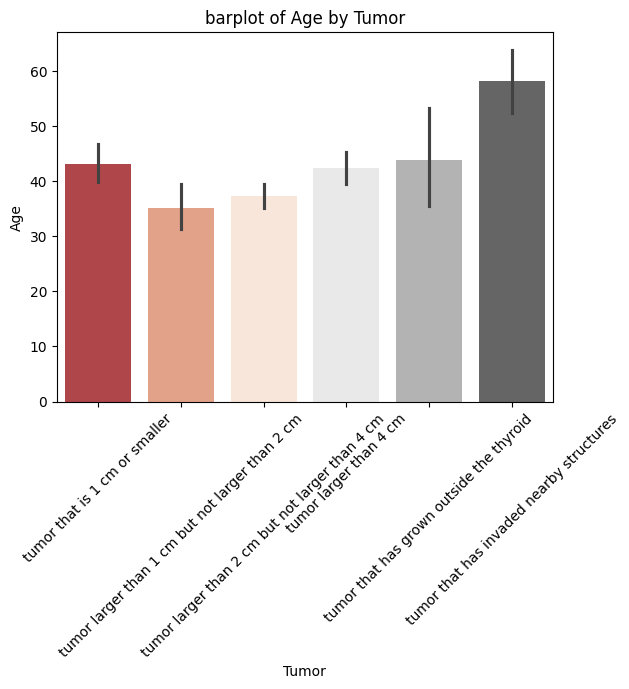

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Tumor',y='Age',data=df,palette='RdGy')
plt.title('barplot of Age by Tumor')
plt.xlabel('Tumor')
plt.ylabel('Age')
plt.tick_params(axis='x',rotation=45)
plt.show()

Text(0.5, 1.0, 'Percentage of Adenopathy')

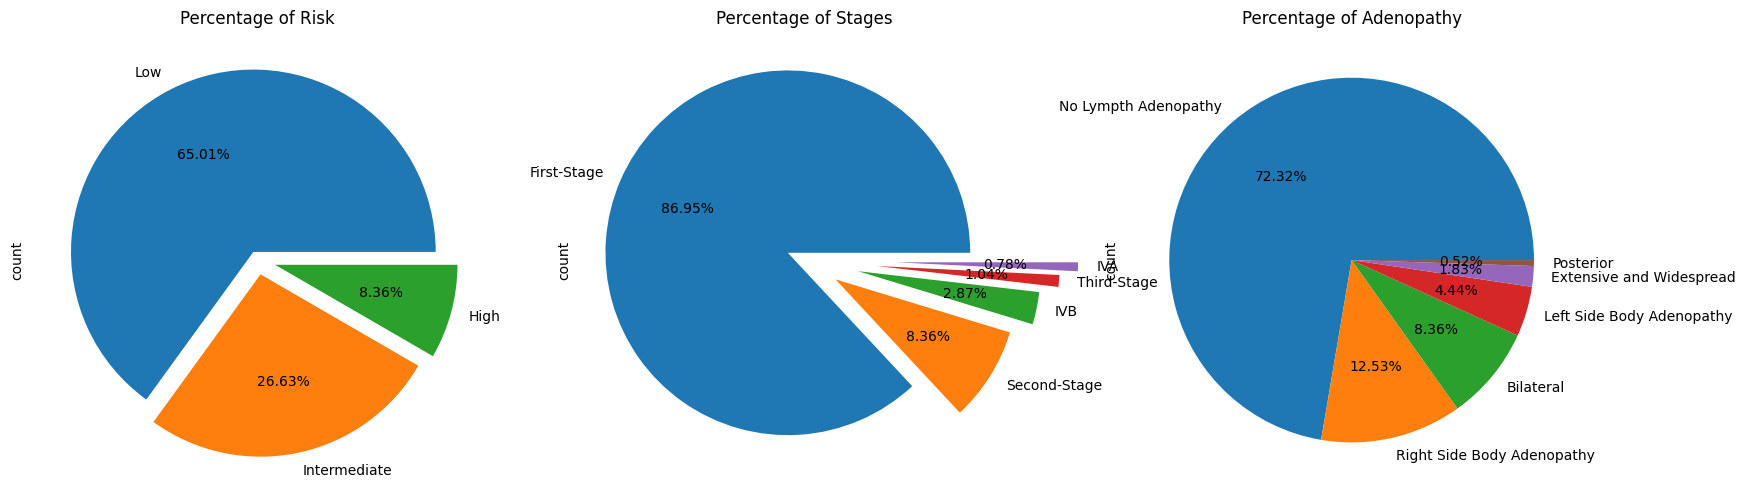

In [39]:
fig,axes=plt.subplots(1,3,figsize=(20,8))

riskdata=df['Risk'].value_counts()
riskdata.plot(kind='pie',autopct='%0.2f%%',explode=[0.05, 0.08, 0.1],labels=riskdata.index,ax=axes[0])
axes[0].set_title('Percentage of Risk')

stages=df['Stage'].value_counts()
stages.plot(kind='pie',autopct='%0.2f%%',explode=[0.1, 0.2, 0.3, 0.4, 0.5],labels=stages.index,ax=axes[1])
axes[1].set_title('Percentage of Stages')

aden=df['Adenopathy'].value_counts()
aden.plot(kind='pie',autopct='%0.2f%%',labels=aden.index,ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')

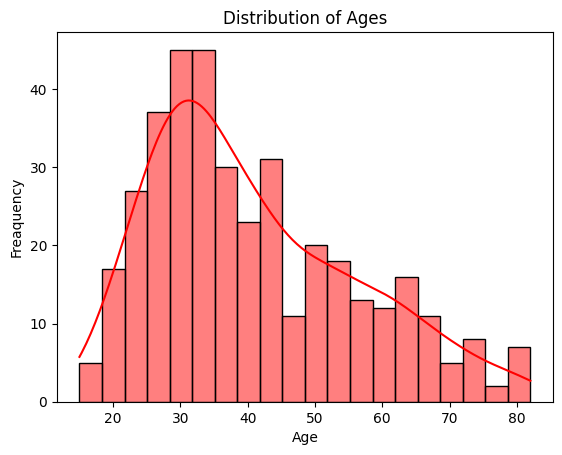

In [40]:
sns.histplot(df['Age'],bins=20,kde=True,color='red')
plt.xlabel('Age')
plt.ylabel('Freaquency')
plt.title('Distribution of Ages')
plt.show()

<ipython-input-41-05cbaa174250>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='OrRd',ax=axes[0])
<ipython-input-41-05cbaa174250>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking',data=df,palette='mako',ax=axes[1])
<ipython-input-41-05cbaa174250>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Treatment Response',data=df,palette='RdGy',ax=axes[2])


[]

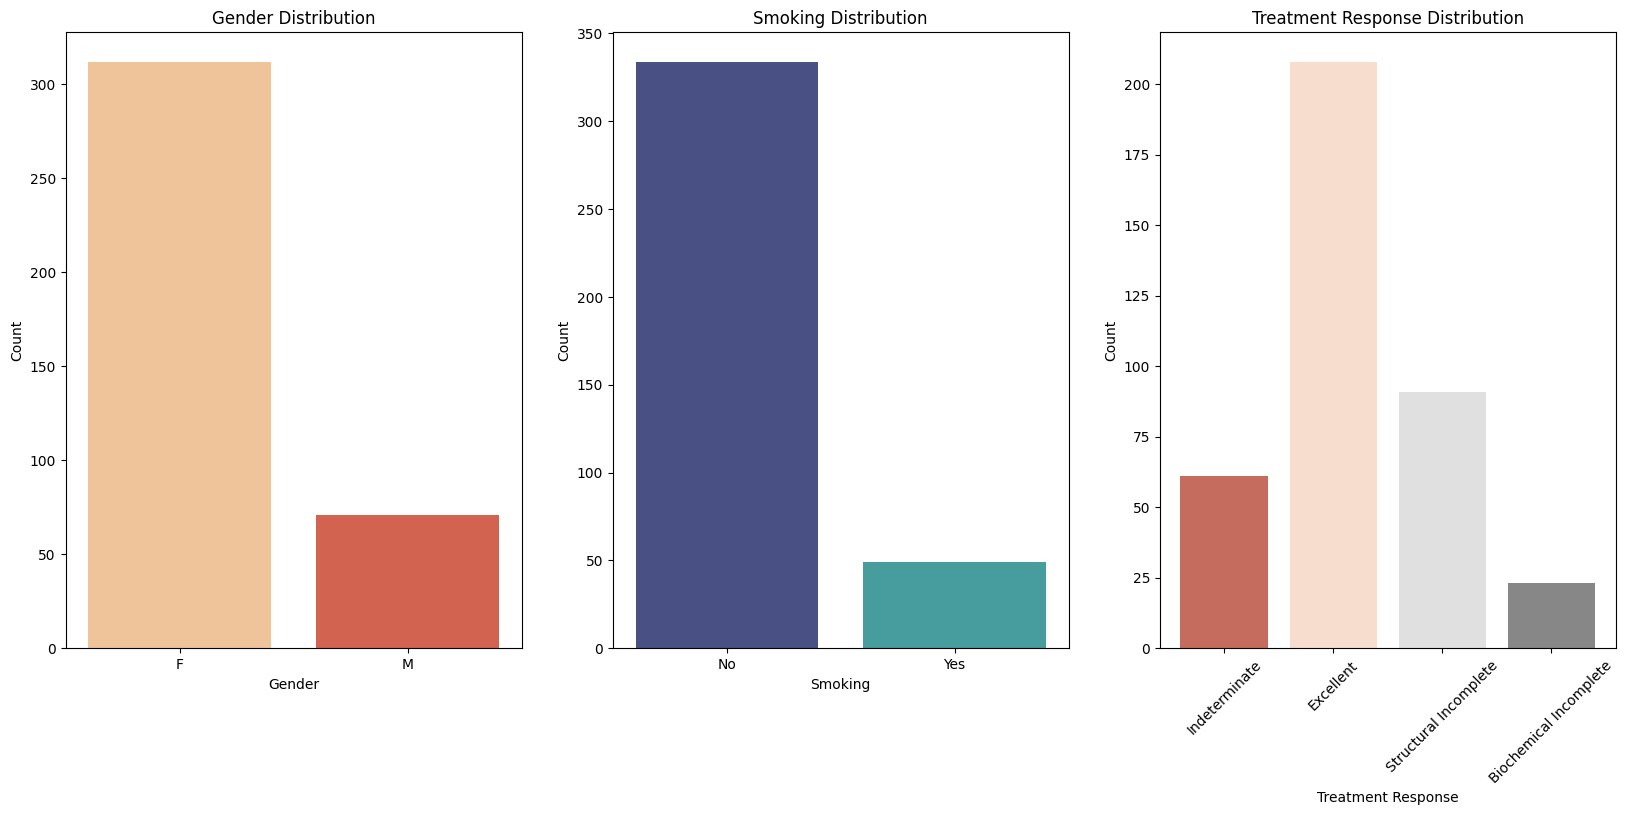

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(x='Gender',data=df,palette='OrRd',ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking',data=df,palette='mako',ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

sns.countplot(x='Treatment Response',data=df,palette='RdGy',ax=axes[2])
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x',rotation=45)

plt.plot()

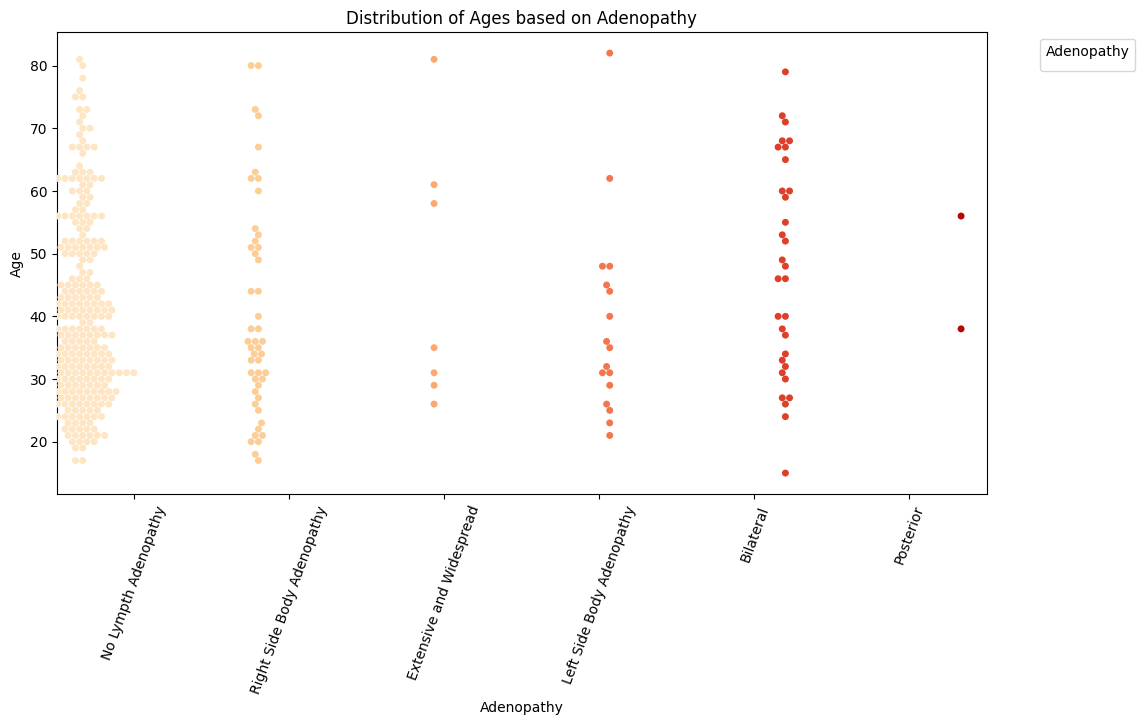

In [42]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Adenopathy', y='Age', data=df, palette='OrRd', hue='Adenopathy', dodge=True)
plt.title('Distribution of Ages based on Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Adenopathy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
def encoding(df):
  x=LabelEncoder()

  for col in df.columns:
    if df[col].dtype == 'object':
      df[col]=x.fit_transform(df[col])
  return(df)

df=encoding(df)
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,5,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,5,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,5,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,5,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,5,0,0,0,1,0


In [44]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [61]:
classifiers = {'K-Nearest Neighbors': KNeighborsClassifier(),
               'Naive Bayes': GaussianNB(),
               'Support Vector Machine': SVC(),
               'Decision Tree': DecisionTreeClassifier()}

Classifier: K-Nearest Neighbors
result:[[71  5]
 [13 26]]
Accuracy: 0.8435
cmd:<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7a73916196f0>

Classifier: Naive Bayes
result:[[70  6]
 [11 28]]
Accuracy: 0.8522
cmd:<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7a7399b081c0>

Classifier: Support Vector Machine
result:[[68  8]
 [ 5 34]]
Accuracy: 0.8870
cmd:<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7a739b802d70>

Classifier: Decision Tree
result:[[71  5]
 [ 3 36]]
Accuracy: 0.9304
cmd:<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7a7399c47100>



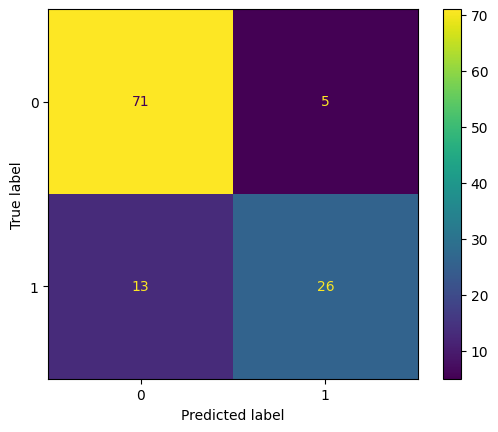

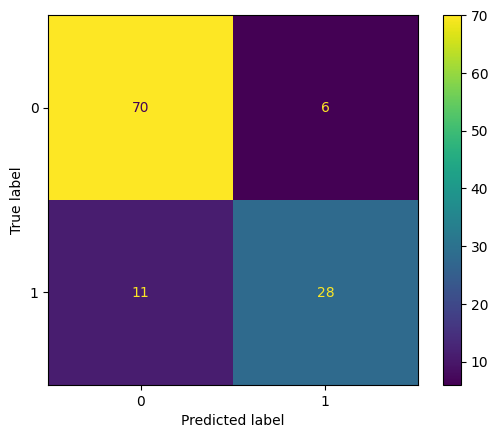

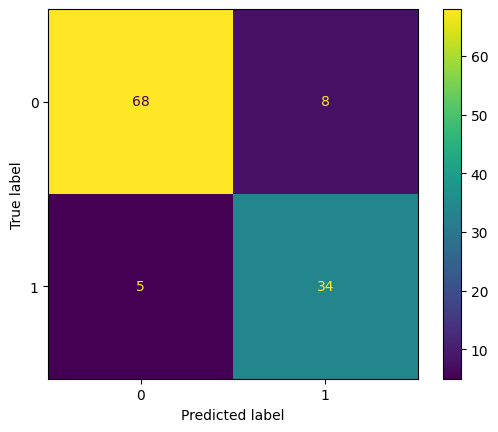

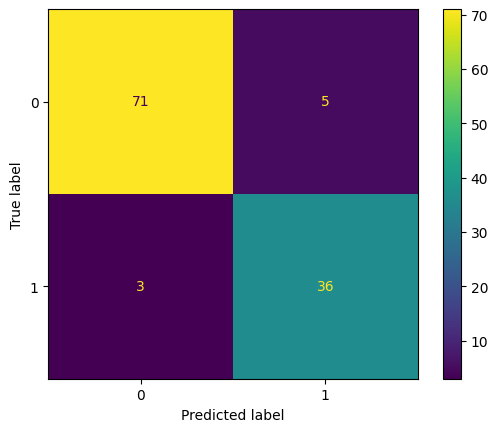

In [70]:
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result=confusion_matrix(y_test,y_pred)
    label=['0','1']
    cmd=ConfusionMatrixDisplay(result,display_labels=label)
    cmd.plot()
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f'result:{result}')
    print(f"Accuracy: {accuracy:.4f}")
    print(f'cmd:{cmd}')
    print()